In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

# Data set Explanation



•	Retailer: Represents the business or individual that sells Adidas products directly to consumers.

•	Retailer ID: A unique identifier assigned to each retailer in the dataset.

•	Invoice Date: The date when a particular invoice or sales transaction took place.

•	Region: Refers to a specific geographical area or district where the sales activity or retail operations occur.

•	State: Represents a specific administrative division or territory within a country.

•	City: Refers to an urban area or municipality where the sales activity or retail operations are conducted.

•	Product: Represents the classification or grouping of Adidas products.

•	Price per Unit: The cost or price associated with a single unit of a product.

•	Units Sold: The quantity or number of units of a particular product sold during a specific sales transaction.

•	Total Sales: The overall revenue generated from the sales transactions.

•	Operating Profit: The profit earned by the retailer from its normal business operations.

•	Sales Method: The approach or channel used by the retailer to sell its products or services.

In [ ]:

data  =pd.read_csv("/content/adidas_clean_Data.csv")
data.sample(5 )

,Retailer,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method,Month,Year,Gender,Unit_catogry
3987,Walmart,2020-08-21,South,Texas,Houston,Women's Athletic Footwear,38,203,7714.0,4396.98,0.57,Online,8,2020,Female,250-500
4290,Sports Direct,2021-09-28,South,Texas,Dallas,Men's Street Footwear,53,181,9593.0,5276.15,0.55,Online,9,2021,Male,250-500
7400,Sports Direct,2021-12-06,Northeast,New Jersey,Newark,Women's Athletic Footwear,47,83,3901.0,1989.51,0.51,Online,12,2021,Female,50-150
7156,West Gear,2021-07-16,Northeast,West Virginia,Charleston,Women's Apparel,63,133,8379.0,4524.66,0.54,Online,7,2021,Female,150-250
983,Sports Direct,2021-04-30,South,Tennessee,Knoxville,Women's Athletic Footwear,54,400,21600.0,121000.00,0.55,Outlet,4,2021,Female,750-1000


# EDA

# 'Retailer'


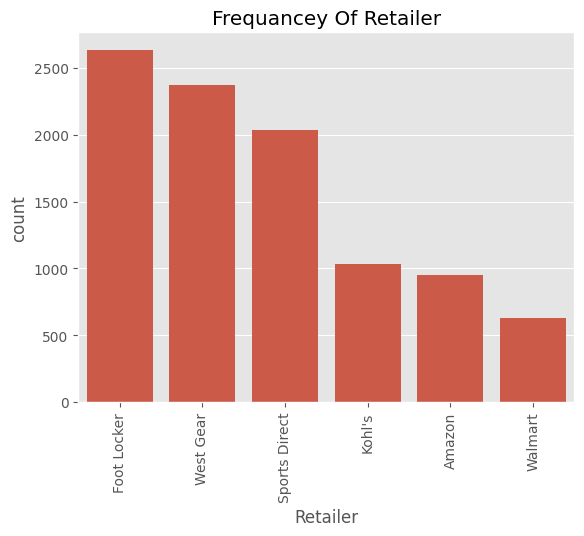

In [ ]:
# 1
plt.style.use("ggplot")
sns.countplot(data =data ,x= data.Retailer , order=data.Retailer.value_counts().index)
plt.xticks(rotation = 90)
plt.title("Frequancey Of Retailer")
plt.show()

`foot locker` is the most frequact

# Most popular products for each retailer?

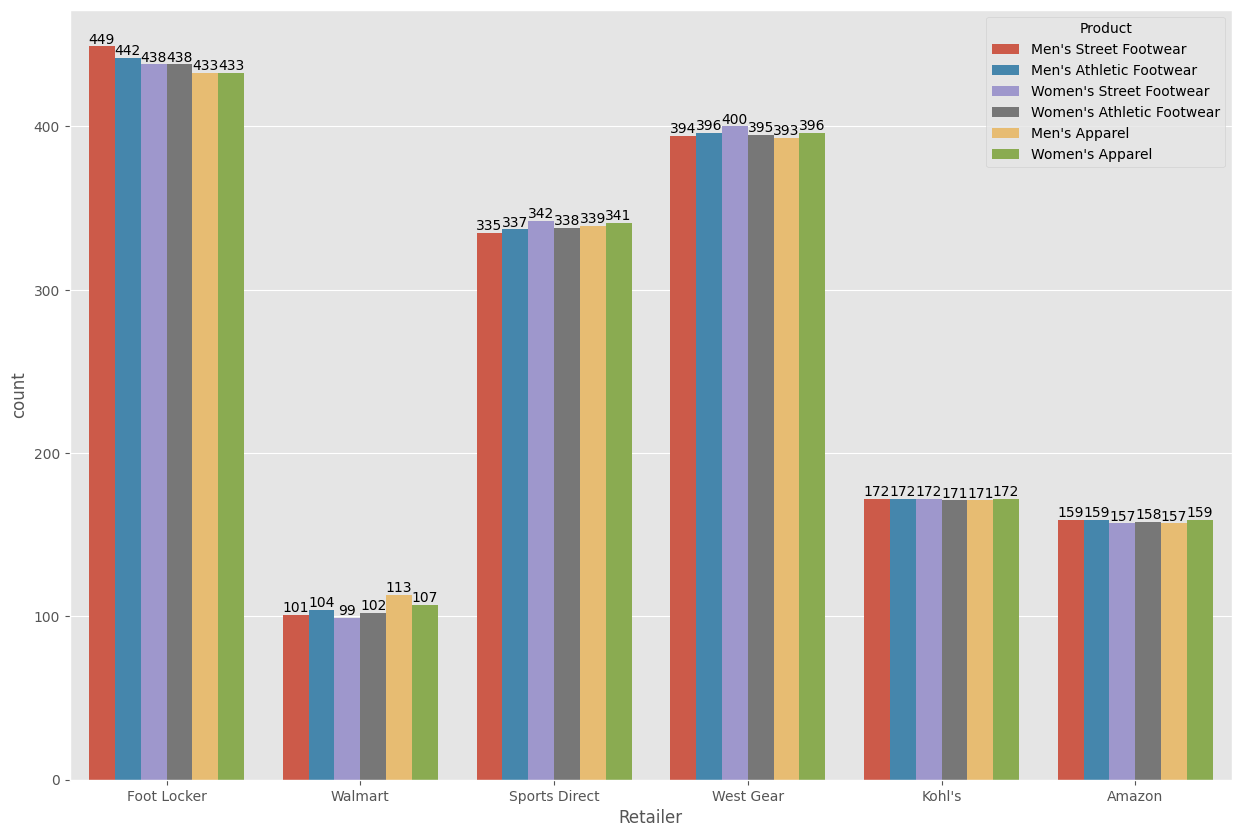

In [ ]:
# 1
plt.figure(figsize=(15,10))
figer =sns.countplot(data=data , x="Retailer" , hue="Product")
for contain in figer.containers :
    figer.bar_label(contain)

# from graph


Foot Locker has the most stores for men’s and women’s street footwear.


most :

    1-Men's Street FootWear
    2-Men's Atheetic


Walmart has the fewest stores for all product categories except women’s apparel.


most :

    1-Men's Apperal
    2-Women's Apperal




# The  Most `Sales Method` is ......... .

In [ ]:
data["Sales Method"].value_counts()

Sales Method
Online      4887
Outlet      3017
In-store    1740
Name: count, dtype: int64

The  Most `Sales Method` is Online


# For each  `Sales Method` , what is the most freq of `Retailer`?

<Axes: xlabel='Sales Method', ylabel='count'>

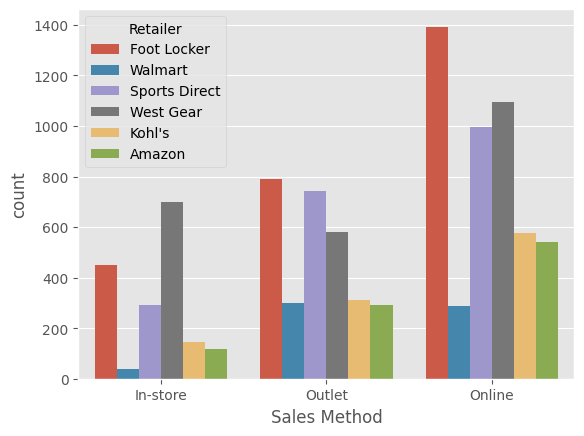

In [ ]:
# 2
sns.countplot(data= data ,x="Sales Method" ,hue="Retailer" )

The Retailer with the highest online sales is Foot Locker

andthe Retailer with the highest in-store sales is West Gear

# What is the most `Sales Method` and What is The  Present  `Total Sales` and `Profits`  ?

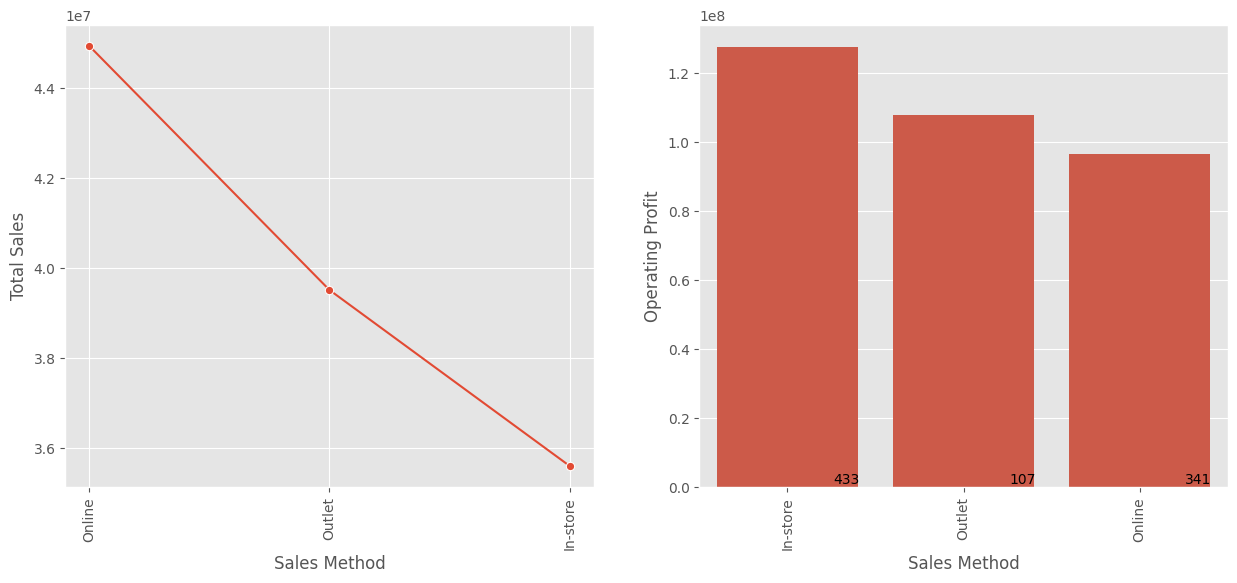

In [ ]:
# 2
plt.figure(figsize = (15,6))
plt.subplot(1,2,1)
Tot =data.groupby("Sales Method")['Total Sales'].sum().reset_index().sort_values(by = 'Total Sales', ascending = False)
sns.lineplot(data= Tot , x="Sales Method" ,y="Total Sales" ,marker="o" )
plt.xticks(rotation = 90)
plt.subplot(1,2,2)
Prof =data.groupby("Sales Method")['Operating Profit'].sum().reset_index().\
sort_values(by = 'Operating Profit', ascending = False)
figer= sns.barplot(data= Prof , x="Sales Method" ,y="Operating Profit" )
for cotain in figer.containers :
    figer.bar_label(contain)
plt.xticks(rotation = 90)
plt.show()

In [ ]:
tabel =data.groupby("Sales Method")[['Total Sales' ,"Operating Profit" ]].sum().reset_index()
tabel["Precentage"] =((tabel['Total Sales'] / tabel['Total Sales'].sum()) * 100).round()
tabel

,Sales Method,Total Sales,Operating Profit,Precentage
0,In-store,35602580.0,1.275913e+08,30.0
1,Online,44939168.0,9.655518e+07,37.0
2,Outlet,39514012.0,1.079883e+08,33.0


The Top `sales Method` have Total Sales and Profit `Online` with 43%

# What is the most `Product` and What is The Present  `Total Sales` and `Profits`  ?

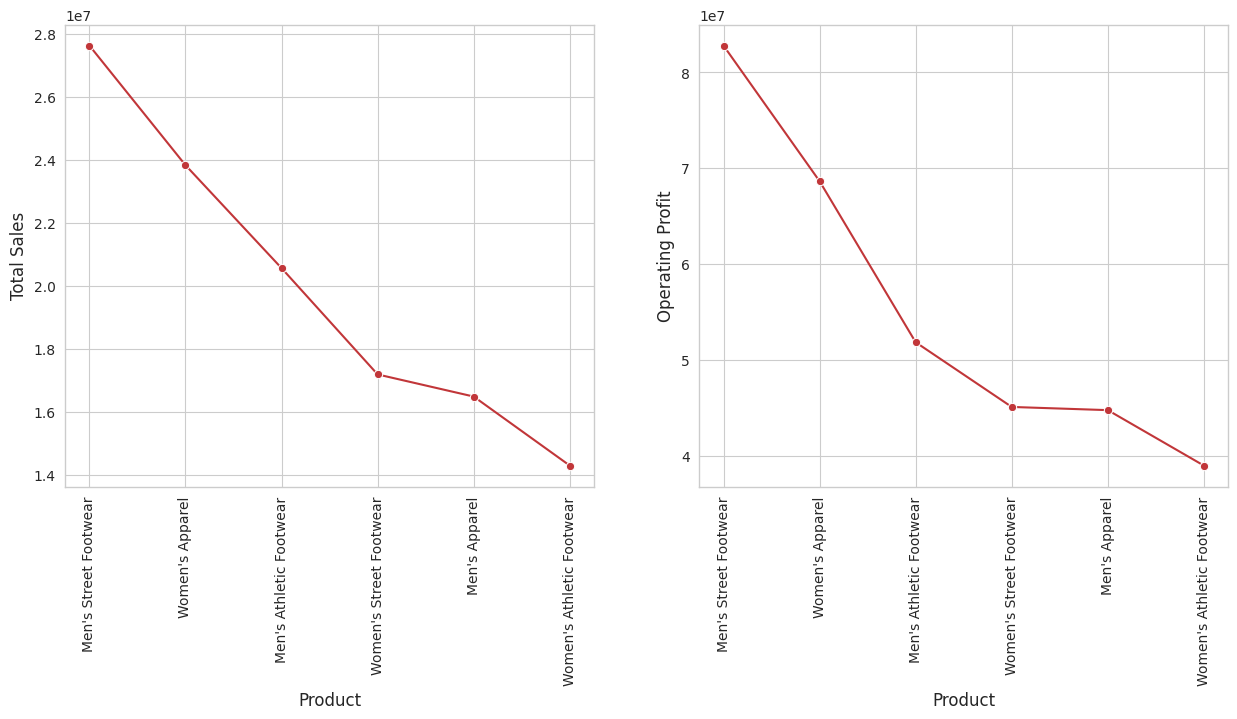

In [ ]:
# 3
sns.set_style("whitegrid")
sns.set_palette("RdBu")
plt.figure(figsize = (15,6))
plt.subplot(1,2,1)
Tot =data.groupby("Product")['Total Sales'].sum().reset_index().sort_values(by = 'Total Sales', ascending = False)
sns.lineplot(data= Tot , x="Product" ,y="Total Sales" ,marker="o" )
plt.xticks(rotation = 90)
plt.subplot(1,2,2)
Prof =data.groupby("Product")['Operating Profit'].sum().reset_index().\
sort_values(by = 'Operating Profit', ascending = False)
sns.lineplot(data= Prof , x="Product" ,y="Operating Profit" ,marker="o" )
plt.xticks(rotation = 90)
plt.show()

The Top Product have Total Sales and Profit is `Mens Street Footwear` with 23%

In [ ]:
tabel =data.groupby("Region")[['Total Sales' ,"Operating Profit" ]].sum().reset_index()
tabel["Precentage"] =((tabel['Total Sales'] / tabel['Total Sales'].sum()) * 100).round()
tabel

,Region,Total Sales,Operating Profit,Precentage
0,Midwest,16644270.0,52811346.48,14.0
1,Northeast,25039652.0,68020587.65,21.0
2,South,20590245.0,61138004.07,17.0
3,Southeast,21362361.0,60555416.70,18.0
4,West,36419232.0,89609406.55,30.0


The Top `Region Method` have Total Sales and Profit `West` with 43%

# What is the most profitable sales method for each product?







<Axes: xlabel='Sales Method', ylabel='Operating Profit'>

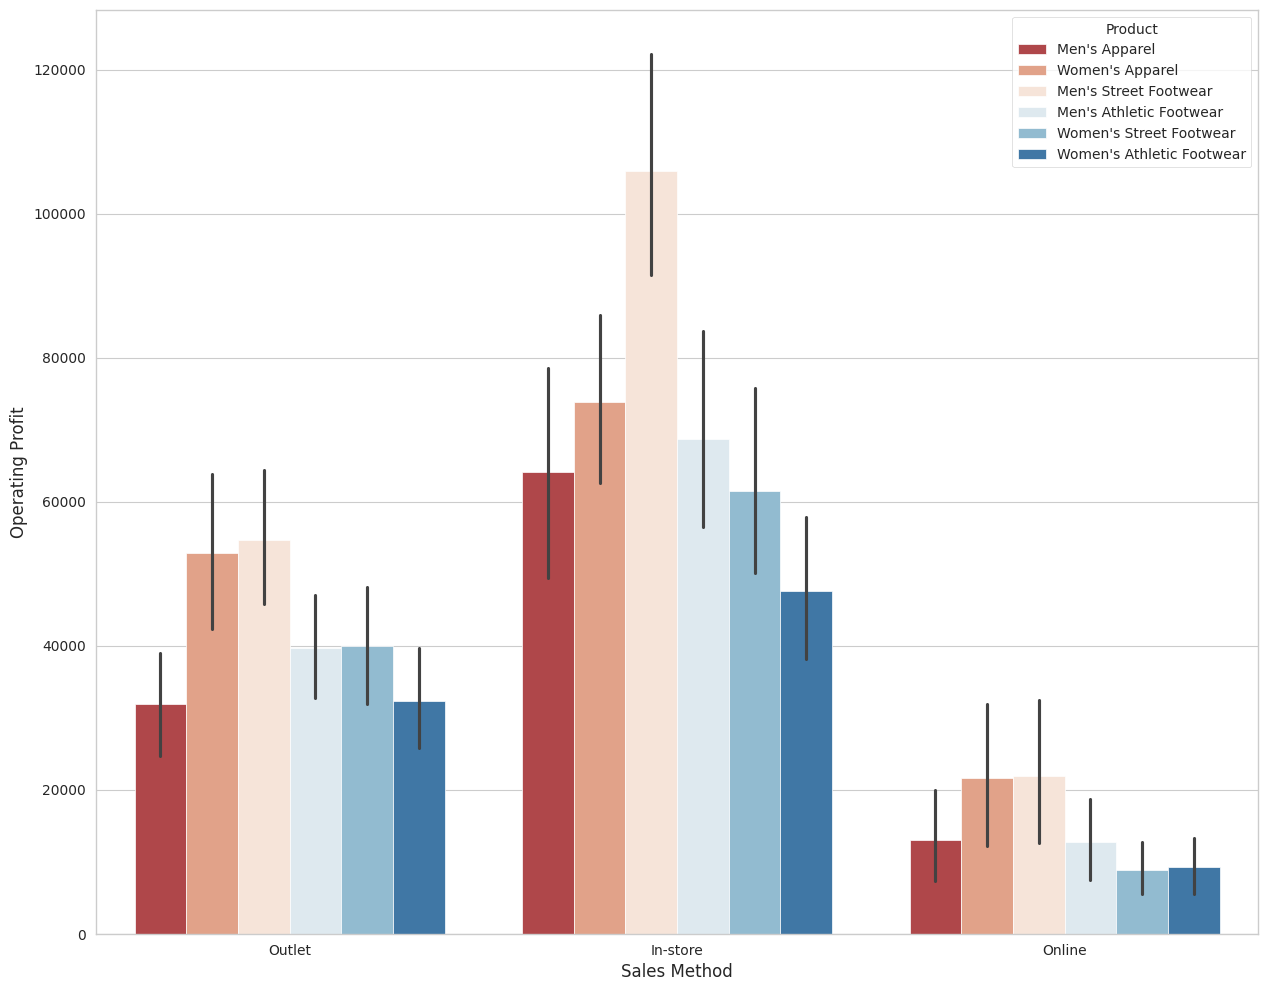

In [ ]:
# 3
top_10_city = data["City"].value_counts().sort_values(ascending=False)[:10] .index
data_of_Top10 = data [data["City"].isin(top_10_city)]
sns.set_style("whitegrid")
plt.figure(figsize=(15,12))
sns.barplot(data_of_Top10 , x="Sales Method" ,y="Operating Profit" ,hue="Product")

# What is the most profitable `Region` for each product?


<Axes: xlabel='Region', ylabel='Operating Profit'>

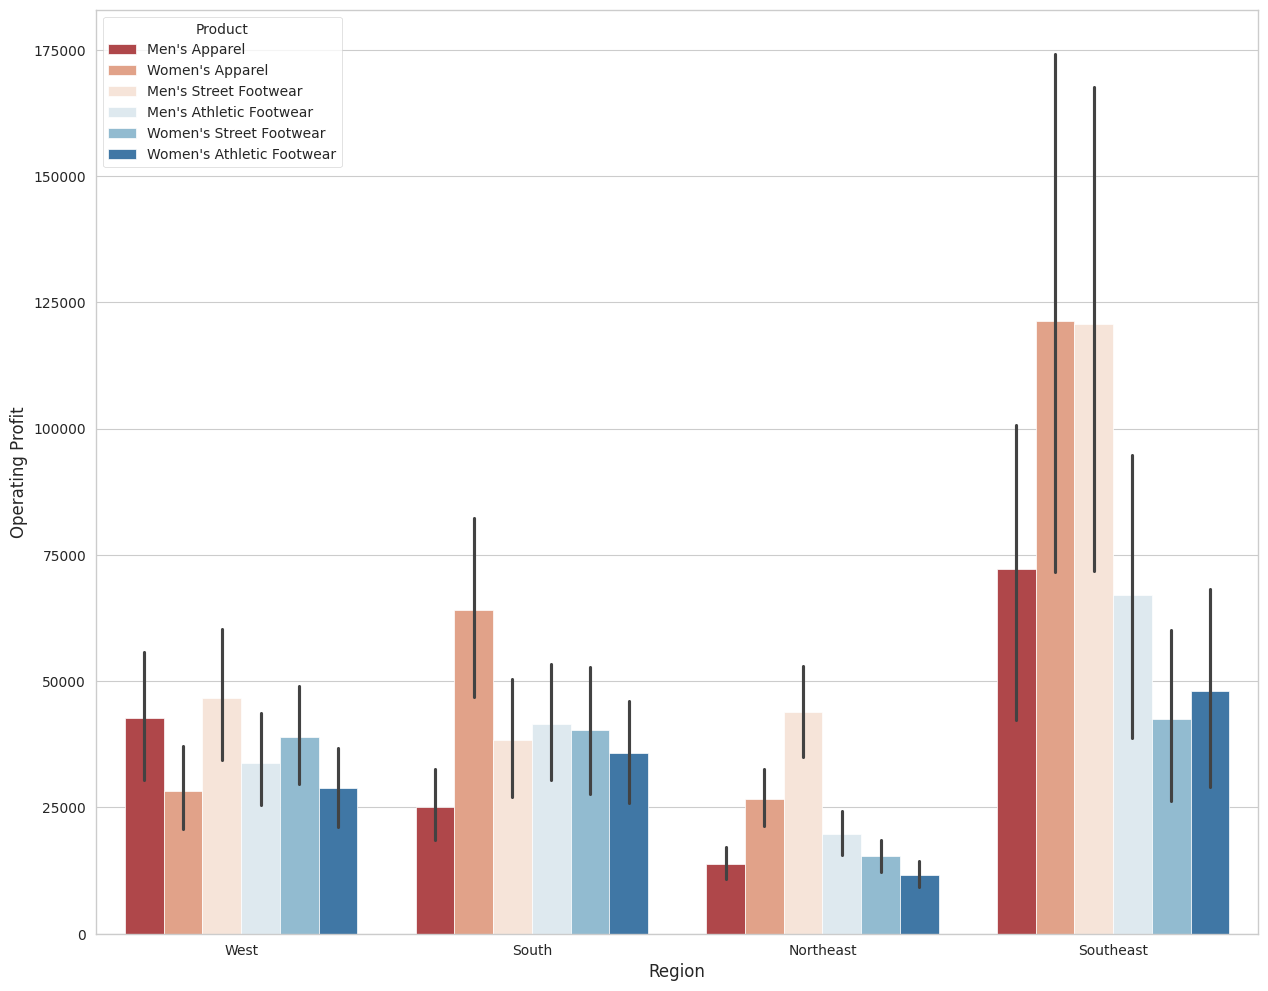

In [ ]:
# 3
sns.set_style("whitegrid")
plt.figure(figsize=(15,12))
sns.barplot(data_of_Top10 , x="Region" ,y="Operating Profit" ,hue="Product")